In [1]:
# Homework 6 Template
# G. Besla & R. Li
# Abhinav Vatsa
# 400 B
import os
print("Current Working Directory:", os.getcwd())
print("Contents of directory:", os.listdir())
# I had to use the D directory (A USB drive) for extracting files because of space related issues.
# Thanks to Christian for reviewing my code, and thanks to my 400B classmates for providing me with a basic guideline for the parts that I was stuck on. 


Current Working Directory: D:\Abhinav Tar Files
Contents of directory: ['MW', 'M33', 'M31', 'OrbitCOM.ipynb', 'ReadFile.py', 'CenterOfMass2.py', '.ipynb_checkpoints']


In [6]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



MW COM Position (kpc): [-2.07  2.95 -1.45] kpc
MW COM Velocity (km/s): [ 0.94  6.32 -1.35] km / s
M31 COM Position (kpc): [-377.66  611.43 -284.64] kpc
M31 COM Velocity (km/s): [ 72.85 -72.14  49.  ] km / s
M33 COM Position (kpc): [-476.22  491.44 -412.4 ] kpc
M33 COM Velocity (km/s): [ 44.42 101.78 142.23] km / s
MW-M31 Separation: 769.098 kpc
MW-M31 Velocity: 117.738 km / s
M33-M31 Separation: 201.083 kpc
M33-M31 Velocity: 199.370 km / s


In [16]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          
    outputs: 
    """
    
    # compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"
    # Setting conditionals accounting for different degrees of stripping levels for M33 vs M31 and MW
    delta = 0.1
    if galaxy == "M33":
        volDec = 4.0
    else:
        volDec = 2.0

    # generate the snapshot id sequence 
    snap_ids = np.arange(start, end+1, n)  
    # using the print function to perform a single test:
    if len(snap_ids) == 0:
        print("Error. Double check inputs!")
        return

    # initialize the array for orbital info: t, x, y, z, vx, vy, vz
    orbit = np.zeros((len(snap_ids), 7))

    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):
        
        # compose the data filename 
        # if using local directories named MW, M31, M33 for the files, do:
        ilbl = f"{snap_id:03d}"   
        filename = f"{galaxy}/{galaxy}_{ilbl}.txt"





        # Create an instance of the CenterOfMass class, using only DISK particles
        COM = CenterOfMass(filename, 2)

        # Compute the center of mass position and velocity  
        # COM_P takes volDec into account  
        com_pos = COM.COM_P(delta=delta, volDec=volDec)
        com_vel = COM.COM_V(com_pos[0], com_pos[1], com_pos[2])
        
        # Store time, position, and velocity in the orbit array (without units)
        # Convert time from Myr to Gyr by dividing by 1000
        orbit[i, 0] = COM.time.to(u.Gyr).value
        orbit[i, 1] = com_pos[0].value  # x-position
        orbit[i, 2] = com_pos[1].value  # y-position
        orbit[i, 3] = com_pos[2].value  # z-position
        orbit[i, 4] = com_vel[0].value  # x-velocity
        orbit[i, 5] = com_vel[1].value  # y-velocity
        orbit[i, 6] = com_vel[2].value  # z-velocity
        
        # Print progress update, this will be a long print sequence
        print(f"Snapshot executed {snap_id}")

    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [18]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)


Snapshot executed 0
Snapshot executed 5
Snapshot executed 10
Snapshot executed 15
Snapshot executed 20
Snapshot executed 25
Snapshot executed 30
Snapshot executed 35
Snapshot executed 40
Snapshot executed 45
Snapshot executed 50
Snapshot executed 55
Snapshot executed 60
Snapshot executed 65
Snapshot executed 70
Snapshot executed 75
Snapshot executed 80
Snapshot executed 85
Snapshot executed 90
Snapshot executed 95
Snapshot executed 100
Snapshot executed 105
Snapshot executed 110
Snapshot executed 115
Snapshot executed 120
Snapshot executed 125
Snapshot executed 130
Snapshot executed 135
Snapshot executed 140
Snapshot executed 145
Snapshot executed 150
Snapshot executed 155
Snapshot executed 160
Snapshot executed 165
Snapshot executed 170
Snapshot executed 175
Snapshot executed 180
Snapshot executed 185
Snapshot executed 190
Snapshot executed 195
Snapshot executed 200
Snapshot executed 205
Snapshot executed 210
Snapshot executed 215
Snapshot executed 220
Snapshot executed 225
Snapshot e

In [20]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MWdata  = np.genfromtxt("Orbit_MW.txt", comments='#')
M31data = np.genfromtxt("Orbit_M31.txt", comments='#')
M33data = np.genfromtxt("Orbit_M33.txt", comments='#')

# columns: t, x, y, z, vx, vy, vz
t_MW  = MWdata[:, 0]
x_MW  = MWdata[:, 1]
y_MW  = MWdata[:, 2]
z_MW  = MWdata[:, 3]
vx_MW = MWdata[:, 4]
vy_MW = MWdata[:, 5]
vz_MW = MWdata[:, 6]

t_M31  = M31data[:, 0]
x_M31  = M31data[:, 1]
y_M31  = M31data[:, 2]
z_M31  = M31data[:, 3]
vx_M31 = M31data[:, 4]
vy_M31 = M31data[:, 5]
vz_M31 = M31data[:, 6]

t_M33  = M33data[:, 0]
x_M33  = M33data[:, 1]
y_M33  = M33data[:, 2]
z_M33  = M33data[:, 3]
vx_M33 = M33data[:, 4]
vy_M33 = M33data[:, 5]
vz_M33 = M33data[:, 6]



In [22]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def VectorDiffMag(x1, y1, z1, x2, y2, z2):
    """
    Returns the difference between the magnitudes of the two position vectors
    """
    return np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2 )

def VectorDiffMagVel(vx1, vy1, vz1, vx2, vy2, vz2):
    """
    Returns the difference between the magnitudes of the two velocity vectors
    """
    return np.sqrt( (vx2 - vx1)**2 + (vy2 - vy1)**2 + (vz2 - vz1)**2 )


In [24]:
# Determine the magnitude of the relative position and velocities 

# Relative magnitudes of MW and M31
v_MW_M31  = VectorDiffMagVel(vx_MW, vy_MW, vz_MW, vx_M31, vy_M31, vz_M31)

r_MW_M31  = VectorDiffMag(x_MW,  y_MW,  z_MW,  x_M31,  y_M31,  z_M31)

# Relative magnitudes of M33 and M31
v_M33_M31 = VectorDiffMagVel(vx_M33, vy_M33, vz_M33, vx_M31, vy_M31, vz_M31)

r_M33_M31 = VectorDiffMag(x_M33, y_M33, z_M33, x_M31, y_M31, z_M31)


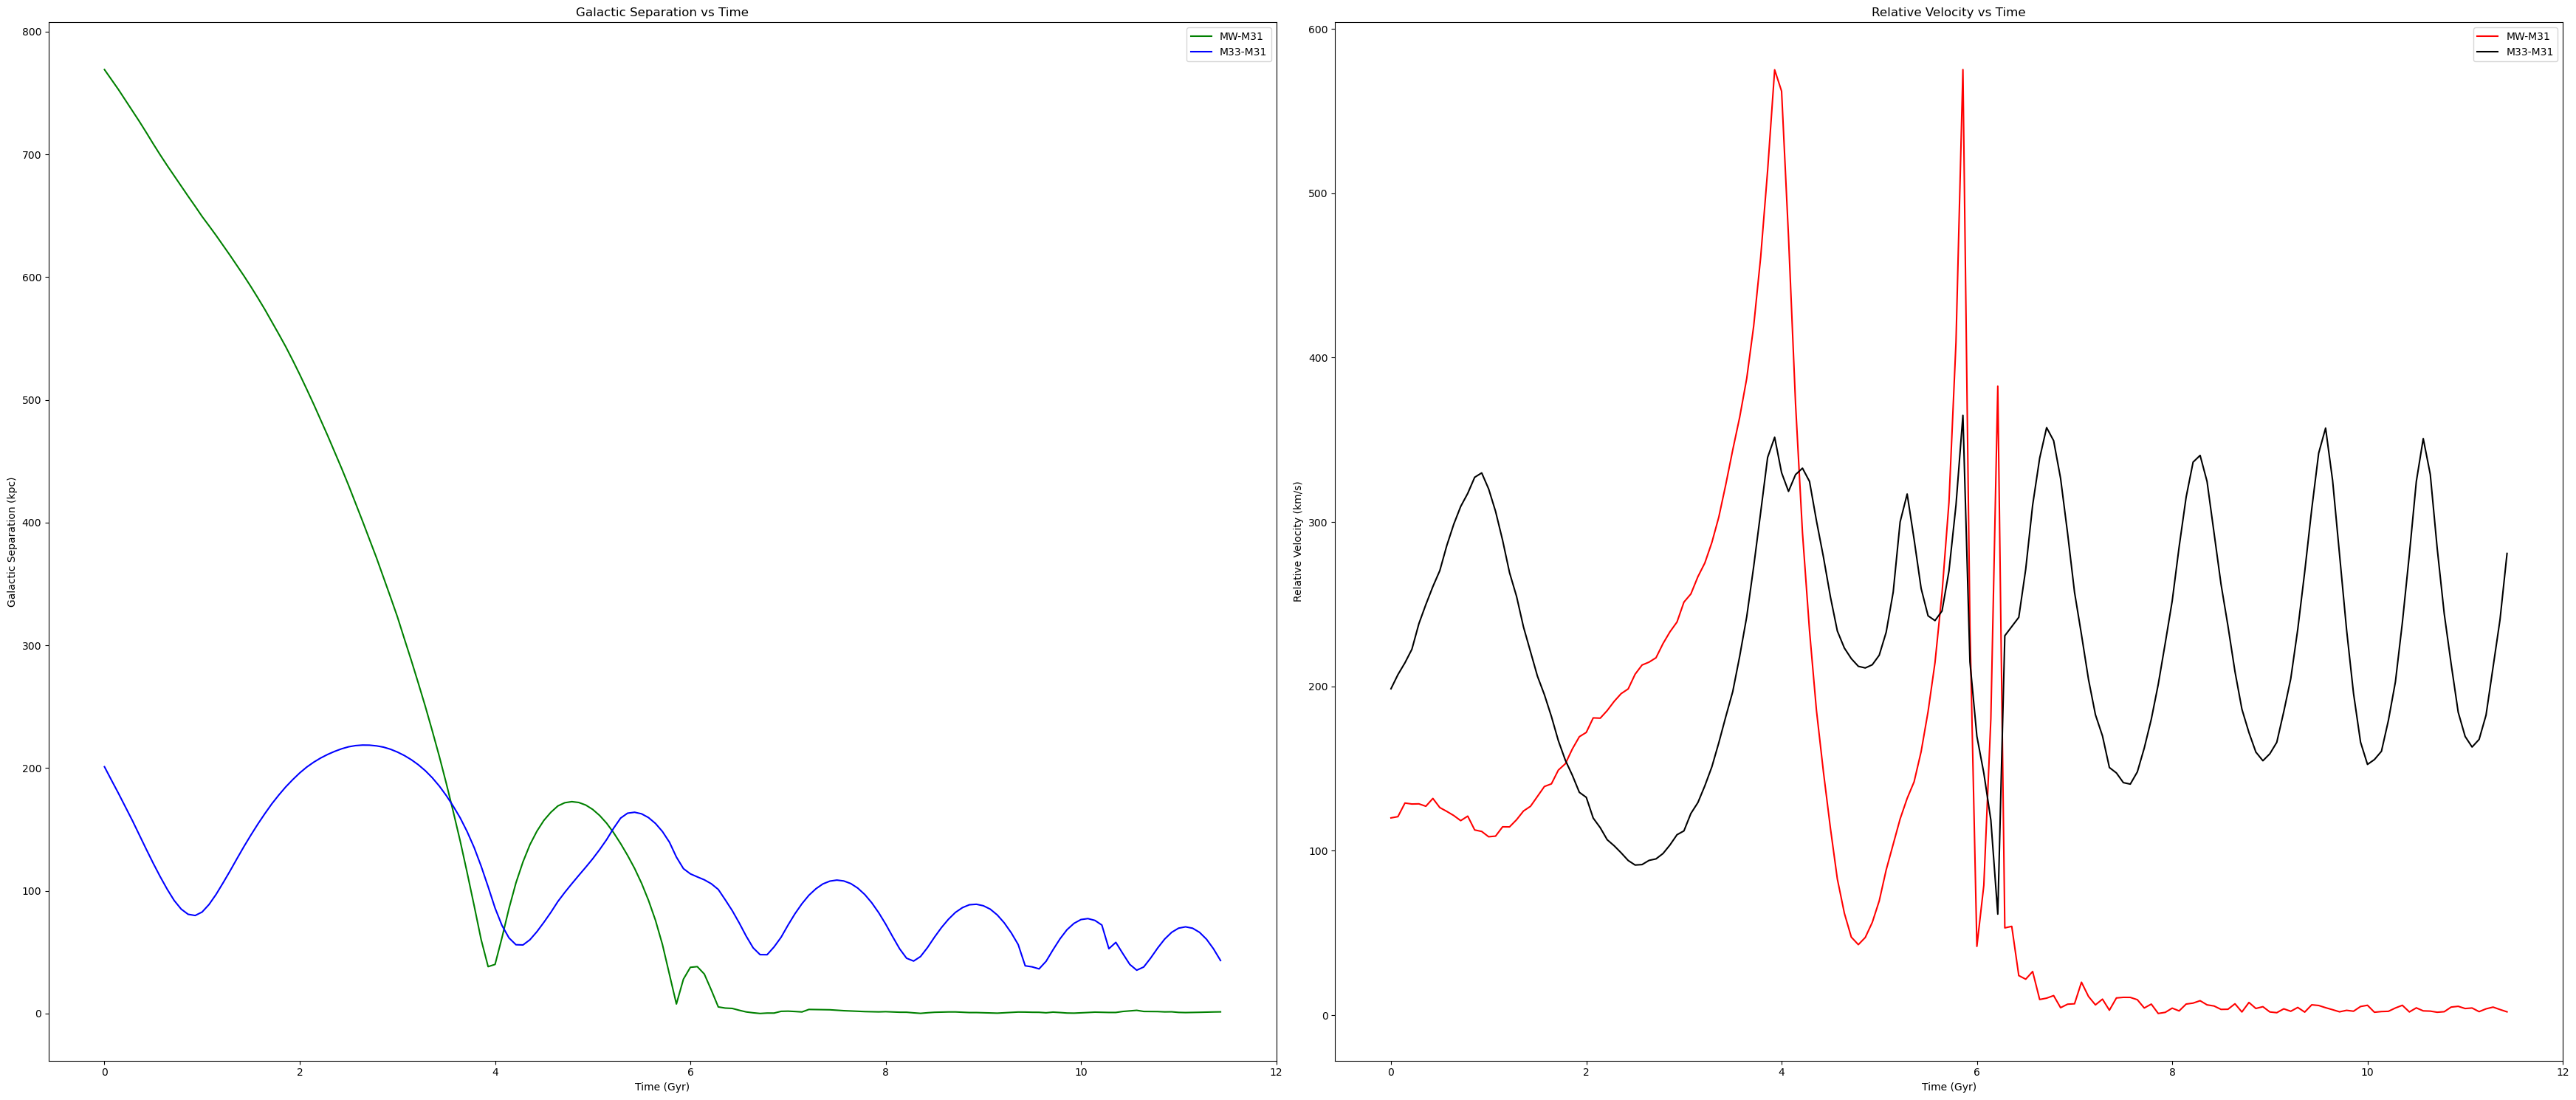

In [28]:
# Setting up the plot
fig, ax = plt.subplots(1, 2, figsize=(35,15))

# Left panel: Temporal evolution of the galactic separations  
ax[0].plot(t_MW, r_MW_M31, color='green', label='MW-M31')
ax[0].plot(t_M31, r_M33_M31, color='blue', label='M33-M31')
ax[0].set_xlabel('Time (Gyr)')
ax[0].set_ylabel('Galactic Separation (kpc)')
ax[0].set_title('Galactic Separation vs Time')
ax[0].legend()

# Right panel: Evolution of relative velocities over time  
ax[1].plot(t_MW, v_MW_M31, color='red', label='MW-M31')
ax[1].plot(t_M31, v_M33_M31, color='black', label='M33-M31')
ax[1].set_xlabel('Time (Gyr)')
ax[1].set_ylabel('Relative Velocity (km/s)')
ax[1].set_title('Relative Velocity vs Time')
ax[1].legend()

plt.tight_layout()
plt.show()
